<a href="https://colab.research.google.com/github/Aditya-titus/Machine-learning/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

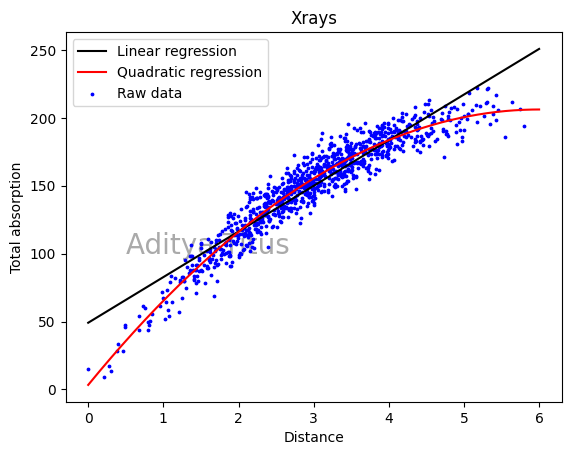

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading data into a pandas dataframe
df = pd.read_csv('http://pogo.software/me4ml/xray.csv')

# Importing pandas data frame columns into arrays
x = np.array(df['Distance (mm)'][:])
y = np.array(df['Total absorption'][:])
x2 = x**2


# Parameters to fill in the matrix to perform regression - sum of x,y etc. to find line constants
x_sum = np.sum(x)
x2_sum = np.sum(x2)
y_sum = np.sum(y)
xy_sum = np.sum(np.dot(x,y))
x3_sum = np.sum(x**3)
x4_sum = np.sum(x**4)
x2y_sum = np.sum(np.dot(x2,y))

# Array to fit line
x_plot = np.linspace(0,6,200)

# Linear regression
A = np.array([[x_sum, x2_sum],[len(x), x_sum]])
B = np.array([xy_sum, y_sum])
linear_constants = np.linalg.solve(A,B)
y_linear = np.dot(linear_constants[1],x_plot)+linear_constants[0]
plt.plot(x_plot, y_linear, c = 'k', label = 'Linear regression')

# Quadratic regression
A2 = np.array([[x2_sum,x3_sum,x4_sum],[x_sum,x2_sum,x3_sum],[len(x),x_sum,x2_sum]])
B2 = np.array([x2y_sum, xy_sum, y_sum])
quadratic_constants = np.linalg.solve(A2,B2)
y_quadratic = np.dot(quadratic_constants[2],x_plot**2) + np.dot(quadratic_constants[1],x_plot) + quadratic_constants[0]
plt.plot(x_plot, y_quadratic, c = 'r', label = 'Quadratic regression')

# Plotting other information
plt.scatter(x,y, s = 3, c = 'b', label = 'Raw data')
plt.text(0.5,100,'Aditya Titus',size = 20, zorder = 0., color = '#aaaaaa')
plt.xlabel('Distance')
plt.ylabel('Total absorption')
plt.title('Xrays')
plt.legend()
plt.show()